<font size=6>决策树算法</font>
# 决策树概述
决策树（Decision Tree）算法是一种基本的分类与回归方法，是最经常使用的数据挖掘算法之一。决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是 if-then 规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。

决策树学习通常包括 3 个步骤：特征选择、决策树的生成和决策树的修剪。
<img src="images/162042244705421.jpg">

决策树由结点（node）和有向边（directed edge）组成。结点有两种类型：内部结点（internal node）和叶结点（leaf node）。内部结点表示一个特征或属性(features)，叶结点表示一个类(labels)。

用决策树对需要测试的实例进行分类的流程是：

从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子结点；这时，每一个子结点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶结点。最后将实例分配到叶结点的类中。
# 决策树原理
## 熵（entropy）
熵指的是体系的混乱的程度，在不同的学科中也有引申出的更为具体的定义，是各领域十分重要的参量。信息论（information theory）中的熵（香农熵）： 是一种信息的度量方式，表示信息的混乱程度，也就是说：信息越有序，信息熵越低。例如：火柴有序放在火柴盒里，熵值很低，相反，熵值很高。具体的，随机变量$X$的熵的表示式如下：
$$H(X)=-\sum_{i=1}^n{p_i}\log p_i$$

其中，$n$代表$X$的$n$种不同的离散取值。而$p_i$代表了$X$取值为$i$的概率，$\log$为以2或者$e$为底的对数。**概率分布越均匀，熵值越大。**
## 联合熵
两个变量$X和Y$的联合熵表达式：
$$H(X,Y)=-\sum_{i=1}^n{p(x_i,y_i)\log p(x_i,y_i)}$$
## 条件熵
$$H(X|Y)=-\sum_{i=1}^n{p(x_i|y_i)\log p(x_i,y_i)}=\sum_{i=1}^n{p(y_i)H(X|y_i)}$$
## 信息增益
熵$H(X)$度量了$X$的不确定性，条件熵$H(X|Y)$度量了条件$Y$下$X$的不确定性。那么：
$$I(X,Y)=H(X)-H(X|Y)$$
称为，信息增益也叫做互信息，它度量了条件$Y$下$X$不确定性减少的程度。

# 决策树ID3算法
ID3算法就是用信息增益大小来判断当前节点应该用什么特征来构建决策树，即，用计算出的信息增益最大的特征来建立决策树的当前节点。

## 案例
第一列为用户id，第二列为性别，第三列为活跃度，最后一列用户是否流失。我们要解决一个问题：性别和活跃度两个特征，哪个对用户流失影响更大？我们通过计算信息熵可以解决这个问题。
<table><tr>
    <td><img src="images/1491038386555_664_1491038386638.jpg"></td>
    <td><img src="images/1491038414908_7639_1491038414978.jpg"></td>
    </tr></table>
    
**整体熵：**
<!--$$H(X)=-\frac{5}{15}\log_2{(\frac{5}{15})}-\frac{10}{15}\log_2{(\frac{10}{15})}$$-->

In [1]:
from math import *

In [2]:
def h(*args):
    r=0
    s=sum(args)
    args=[i/s for i in args]
    for i in args:
        if i!=0 and i!=1:
            r+=-i*log2(i)
    return r

In [3]:
hx=h(5,10)
hx

0.9182958340544896

**性别熵：**

In [4]:
hg1,hg2=h(3,5),h(2,5)
hg1,hg2

(0.954434002924965, 0.863120568566631)

**性别信息增益**

In [5]:
ig=hx-8/15*hg1-7/15*hg2
ig

0.006474767163413719

**活跃度增益：**

In [6]:
ia=hx-6/15*h(0,6)-5/15*h(1,4)-4/15*h(4,0)
ia

0.6776531357587021

活跃度的信息增益比性别的信息增益大，也就是说，活跃度对用户流失的影响比性别大。在做特征选择或者数据分析的时候，我们应该重点考察活跃度这个指标。

## 算法流程
输入的是$m$个样本，样本输出集合为$D$，每个样本有$n$个离散特征，特征集合即为$A$，输出为决策树$T$。

**流程：**
1. 初始化信息增益的阈值$ϵ$
2. 判断样本是否为同一类输出$D_i$，如果是则返回单节点树$T$。标记类别为$D_i$
3. 判断特征是否为空，如果是则返回单节点树$T$，标记类别为样本中输出类别$D$实例数最多的类别。
4. 计算$A$中的各个特征（一共$n$个）对输出$D$的信息增益，选择信息增益最大的特征$A_g$
5. 如果$A_g$的信息增益小于阈值$ϵ$，则返回单节点树$T$，标记类别为样本中输出类别$D$实例数最多的类别
6. 否则，按特征$A_g$的不同取值$A_{gi}$将对应的样本输出$D$分成不同的类别$D_i$。每个类别产生一个子节点。对应特征值为$A_{gi}$。返回增加了节点的树$T$
7. 对于所有的子节点，令$D=D_i,A=A−\{A_g\}$递归调用2-6步，得到子树$T_i$并返回。

## 决策树ID3算法的不足
ID3算法虽然提出了新思路，但是还是有很多值得改进的地方。　　
1. ID3没有考虑连续特征，比如长度，密度都是连续值，无法在ID3运用。这大大限制了ID3的用途。
1. ID3采用信息增益大的特征优先建立决策树的节点。很快就被人发现，在相同条件下，取值比较多的特征比取值少的特征信息增益大。比如一个变量有2个值，各为1/2，另一个变量为3个值，各为1/3，其实他们都是完全不确定的变量，但是取3个值的比取2个值的信息增益大。如果校正这个问题呢？
1.  ID3算法对于缺失值的情况没有做考虑
1.  没有考虑过拟合的问题

ID3算法的作者对ID3算法做了改进，这就是C4.5算法。

# 决策树C4.5算法
C4.5算法对于ID3的上述不足做了改进。
## 改进"不能处理连续特征"
C4.5的思路是将连续的特征离散化。比如$m$个样本的连续特征$A$：
1. 从小到大排列为$a_1,a_2,\dots,a_m$,取相邻两样本值的平均数，一共取得$m-1$个划分点，其中第$i$个划分点$T_i$表示为：$Ti=\frac{a_i+a_{i+1}}{2}$。
2. 对于这$m-1$个点，分别计算以该点作为二元分类点时的信息增益。选择信息增益最大的点作为该连续特征的二元离散分类点。比如取到的增益最大的点为$a_t$,则小于$a_t$的值为类别1，大于$a_t$的值为类别2，这样我们就做到了连续特征的离散化。

要注意的是，与离散属性不同的是，如果当前节点为连续属性，则该属性后面可以参与子节点的产生选择过程。
## 改进“信息增益作为标准容易偏向于取值较多的特征的问题”
我们引入一个信息增益比的变量$I_R(X,Y)$，它是信息增益和特征熵的比值。表达式如下：
$$I_R(X,Y)=\frac{I(A,D)}{H_A(D)}$$

其中$D$为样本特征输出的集合，$A$为样本特征，对于特征熵$H_A(D)$, 表达式如下：

$$H_A(D)=-\sum_{i=1}^n{\frac{|D_i|}{|D|}\log_2\frac{|D_i|}{|D|}}$$

其中$n$为特征$A$的类别数， $D_i$为特征$A$的第$i$个取值对应的样本个数。$|D|$为样本个数。

特征数越多的特征对应的特征熵越大，它作为分母，可以校正信息增益容易偏向于取值较多的特征的问题。
## 改进“缺失值处理的问题”
需要解决的是两个问题，一是在样本某些特征缺失的情况下选择划分的属性，二是选定了划分属性，对于在该属性上缺失特征的样本的处理。

**对于第一个子问题：**

对于某一个有缺失特征值的特征$A$。C4.5的思路是将数据分成两部分，对每个样本设置一个权重（初始可以都为1），然后划分数据，一部分是有特征值$A$的数据$D_1$，另一部分是没有特征A的数据$D_2$. 然后对于没有缺失特征$A$的数据集$D_1$来和对应的$A$特征的各个特征值一起计算加权重后的信息增益比，最后乘上一个系数，这个系数是无特征$A$缺失的样本加权后所占加权总样本的比例。

**对于第二个子问题：**

可以将缺失特征的样本同时划分入所有的子节点，不过将该样本的权重按各个子节点样本的数量比例来分配。
## 决策树C4.5算法的不足与思考
C4.5虽然改进或者改善了ID3算法的几个主要的问题，仍然有优化的空间。
1. 由于决策树算法非常容易过拟合，因此对于生成的决策树必须要进行剪枝。剪枝的算法有非常多，C4.5的剪枝方法有优化的空间。思路主要是两种:
    1. 一种是预剪枝，即在生成决策树的时候就决定是否剪枝。
    2. 另一个是后剪枝，即先生成决策树，再通过交叉验证来剪枝。
2. C4.5生成的是多叉树，即一个父节点可以有多个节点。很多时候，在计算机中二叉树模型会比多叉树运算效率高。如果采用二叉树，可以提高效率。
3. C4.5只能用于分类，如果能将决策树用于回归的话可以扩大它的使用范围。
4. C4.5由于使用了熵模型，里面有大量的耗时的对数运算,如果是连续值还有大量的排序运算。如果能够加以模型简化可以减少运算强度但又不牺牲太多准确性的话，那就更好了。

这4个问题在CART树里面部分加以了改进。所以目前如果不考虑集成学习话，在普通的决策树算法里，CART算法算是比较优的算法了。scikit-learn的决策树使用的也是CART算法。

# CART分类树算法
## CART分类树算法的最优特征选择方法
CART分类树算法使用基尼系数来代替信息增益比，基尼系数代表了模型的不纯度，基尼系数越小，则不纯度越低，特征越好。这和信息增益(比)是相反的。

具体的，在分类问题中，假设有$K$个类别，第$k$个类别的概率为$p_k$, 则基尼系数的表达式为：
$$Gini(p)=\sum_{k=1}^K{p_k(1-p_k)}=1-\sum_{k=1}^K{p_k^2}$$

对于个给定的样本$D$,假设有$K$个类别, 第$k$个类别的数量为$C_k$,则样本$D$的基尼系数表达式为：
$$Gini(D)=1-\sum_{k=1}^K{(\frac{|C_k|}{|D|})}^2$$

特别的，对于样本$D$,如果根据特征$A$的某个值$a$,把$D$分成$D_1$和$D_2$两部分，则在特征$A$的条件下，$D$的基尼系数表达式为：
$$Gini(D,A)=\frac{|D_1|}{|D|}Gini(D_1)+\frac{|D_2|}{|D|}Gini(D_2)$$
## CART分类树算法对于连续特征和离散特征处理的改进
对于CART分类树连续值的处理问题，其思想和C4.5是相同的，都是将连续的特征离散化。唯一的区别在于在选择划分点时的度量方式不同，C4.5使用的是信息增益比，则CART分类树使用的是基尼系数。

CART分类树离散值的处理，采用的思路是不停的二分离散特征。

回忆下ID3或者C4.5，如果某个特征A被选取建立决策树节点，如果它有A1,A2,A3三种类别，我们会在决策树上一下建立一个三叉的节点。这样导致决策树是多叉树。但是CART分类树使用的方法不同，他采用的是不停的二分，CART分类树会考虑把A分成{A1}和{A2,A3}, {A2}和{A1,A3}, {A3}和{A1,A2}三种情况，找到基尼系数最小的组合，比如{A2}和{A1,A3},然后建立二叉树节点，一个节点是A2对应的样本，另一个节点是{A1,A3}对应的节点。同时，由于这次没有把特征A的取值完全分开，后面我们还有机会在子节点继续选择到特征A来划分A1和A3。这和ID3或者C4.5不同，在ID3或者C4.5的一棵子树中，离散特征只会参与一次节点的建立。

## CART分类树建立算法的具体流程
算法输入是训练集D，基尼系数的阈值，样本个数阈值。输出是决策树T。

我们的算法从根节点开始，用训练集递归的建立CART树。
1. 对于当前节点的数据集为$D$，如果样本个数小于阈值或者没有特征，则返回决策子树，当前节点停止递归。
2. 计算样本集$D$的基尼系数，如果基尼系数小于阈值，则返回决策树子树，当前节点停止递归。
3. 计算当前节点现有的各个特征的各个特征值对数据集$D$的基尼系数。
4. 在计算出来的各个特征值对数据集$D$的基尼系数中，选择基尼系数最小的特征$A$和对应的特征值$a$。根据这个最优特征和最优特征值，把数据集划分成两部分$D1$和$D2$，同时建立当前节点的左右节点，左节点的数据集$D为D1$，右节点的数据集$D为D2$.
5. 对左右的子节点递归的调用1-4步，生成决策树。

对于生成的决策树做预测的时候，假如测试集里的样本A落到了某个叶子节点，而节点里有多个训练样本。则对于A的类别预测采用的是这个叶子节点里概率最大的类别。

## CART回归树建立算法
CART回归树和CART分类树的建立和预测的区别主要有下面两点：
1. 连续值的处理方法不同
2. 决策树建立后做预测的方式不同。

**对于连续值的处理：**

回归树，使用了常见的和方差的度量方式，CART回归树的度量目标是，对于任意划分特征$A$，对应的任意划分点$s$两边划分成的数据集$D1和D2$，求出使$D1和D2$各自集合的均方差最小，以及对应的特征和特征值划分点。表达式为：
$$\large\underbrace{min}_{A,s}\Bigg[\underbrace{min}_{c_1}\sum\limits_{x_i \in D_1(A,s)}(y_i - c_1)^2 + \underbrace{min}_{c_2}\sum\limits_{x_i \in D_2(A,s)}(y_i - c_2)^2\Bigg]$$

对于决策树建立后做预测的方式，上面讲到了CART分类树采用叶子节点里概率最大的类别作为当前节点的预测类别。而回归树输出不是类别，它采用的是用最终叶子的均值或者中位数来预测输出结果。
## CART树算法的剪枝
由于决策时算法很容易对训练集过拟合，而导致泛化能力差，为了解决这个问题，我们需要对CART树进行剪枝，即类似于线性回归的正则化，来增加决策树的泛化能力。

CART树的剪枝算法可以概括为两步:
1. 第一步是从原始决策树生成各种剪枝效果的决策树，
2. 第二部是用交叉验证来检验剪枝后的预测能力，选择泛化预测能力最好的剪枝后的数作为最终的CART树。

### 剪枝的损失函数度量
在剪枝的过程中，对于任意的一颗子树T,其损失函数为：
$$C_{\alpha}(T_t) = C(T_t) + \alpha |T_t|$$

其中，$α$为正则化参数，这和线性回归的正则化一样。$C(T_t)$为训练数据的预测误差，分类树是用基尼系数度量，回归树是均方差度量。$|T_t|$是子树T的叶子节点的数量。

当$α=0$时，即没有正则化，原始的生成的CART树即为最优子树。当$α=∞$时，即正则化强度达到最大，此时由原始的生成的CART树的根节点组成的单节点树为最优子树。当然，这是两种极端情况。一般来说，$α$越大，则剪枝剪的越厉害，生成的最优子树相比原生决策树就越偏小。对于固定的$α$，一定存在使损失函数$C_α(T)$最小的唯一子树。
### 剪枝的思路
对于位于节点$t$的任意一颗子树$T_t$，如果没有剪枝，它的损失是:
$$C_{\alpha}(T_t) = C(T_t) + \alpha |T_t|$$

如果将其剪掉，仅仅保留根节点，则损失是:
$$C_{\alpha}(T) = C(T) + \alpha$$

当$α=0$或者$α$很小时，$$C_{\alpha}(T_t) < C_{\alpha}(T)$$

当$α$增大到一定的程度时
$$C_{\alpha}(T_t) = C_{\alpha}(T)$$

当$α$继续增大时不等式反向，也就是说，如果满足下式：
$$\alpha = \frac{C(T)-C(T_t)}{|T_t|-1}$$

$T_t和T$有相同的损失函数，但是$T$节点更少，因此可以对子树$T_t$进行剪枝，也就是将它的子节点全部剪掉，变为一个叶子节点$T$。
### CART树的交叉验证策略
可以计算出每个子树是否剪枝的阈值$α$，如果我们把所有的节点是否剪枝的值$α$都计算出来，然后分别针对不同的$α$所对应的剪枝后的最优子树做交叉验证。这样就可以选择一个最好的$α$，有了这个$α$，我们就可以用对应的最优子树作为最终结果。

### CART树的剪枝算法
输入是CART树建立算法得到的原始决策树$T$。输出是最优决策子树$T_α$。

算法过程如下：
1. 初始化$\alpha_{min}= \infty$， 最优子树集合$\omega=\{T\}$。
2. 从叶子节点开始自下而上计算各内部节点t的训练误差损失函数$C_{\alpha}(T_t)$（回归树为均方差，分类树为基尼系数）, 叶子节点数$|T_t|$，以及正则化阈值$\alpha= min\{\frac{C(T)-C(T_t)}{|T_t|-1}, \alpha_{min}\}$, 更新$α_{min}=α$
3. 得到所有节点的$α$值的集合$M$。
4. 从$M$中选择最大的值$α_k$，自上而下的访问子树$t$的内部节点，如果$\frac{C(T)-C(T_t)}{|T_t|-1} \leq \alpha_k$时，进行剪枝。并决定叶节点t的值。如果是分类树，则是概率最高的类别，如果是回归树，则是所有样本输出的均值。这样得到$α_k$对应的最优子树$T_k$
5. 最优子树集合$\omega=\omega \cup T_k$，$M= M -\{\alpha_k\}$。
6. 如果$M$不为空，则回到步骤4。否则就已经得到了所有的可选最优子树集合$ω$.
7. 采用交叉验证在$ω$选择最优子树$T_α$

## CART算法小结
<table style="height: 88px; width: 100%;" border="1">
<tbody>
<tr>
<td>算法</td>
<td>支持模型</td>
<td>树结构</td>
<td>特征选择</td>
<td>连续值处理</td>
<td>缺失值处理</td>
<td>&nbsp;剪枝</td>
</tr>
<tr>
<td>ID3</td>
<td>分类</td>
<td>多叉树</td>
<td>信息增益</td>
<td>不支持</td>
<td>&nbsp;不支持</td>
<td>&nbsp;不支持</td>
</tr>
<tr>
<td>C4.5</td>
<td>分类</td>
<td>多叉树</td>
<td>信息增益比</td>
<td>支持</td>
<td>&nbsp;支持</td>
<td>&nbsp;支持</td>
</tr>
<tr>
<td>CART</td>
<td>分类，回归</td>
<td>二叉树</td>
<td>基尼系数，均方差</td>
<td>支持</td>
<td>&nbsp;支持</td>
<td>&nbsp;支持</td>
</tr>
</tbody>
</table>

**CART算法主要的缺点:**
1. 无论是ID3, C4.5还是CART,在做特征选择的时候都是选择最优的一个特征来做分类决策，但是大多数，分类决策不应该是由某一个特征决定的，而是应该由一组特征决定的。这样决策得到的决策树更加准确。这个决策树叫做多变量决策树(multi-variate decision tree)。在选择最优特征的时候，多变量决策树不是选择某一个最优特征，而是选择最优的一个特征线性组合来做决策。
2. 如果样本发生一点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习里面的随机森林之类的方法解决。　

# 决策树算法优缺点
优点：

1. 简单直观，生成的决策树很直观。
2. 基本不需要预处理，不需要提前归一化，处理缺失值。
3. 使用决策树预测的代价是$O(\log_2^m)$。 m为样本数。
4. 既可以处理离散值也可以处理连续值。很多算法只是专注于离散值或者连续值。
5. 可以处理多维度输出的分类问题。
6. 相比于神经网络之类的黑盒分类模型，决策树在逻辑上可以得到很好的解释
7. 可以交叉验证的剪枝来选择模型，从而提高泛化能力。
8. 对于异常点的容错能力好，健壮性高。

缺点:

1. 决策树算法非常容易过拟合，导致泛化能力不强。可以通过设置节点最少样本数量和限制决策树深度来改进。
2. 决策树会因为样本发生一点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习之类的方法解决。
3. 寻找最优的决策树是一个NP难的问题，我们一般是通过启发式方法，容易陷入局部最优。可以通过集成学习之类的方法来改善。
4. 有些比较复杂的关系，决策树很难学习，比如异或。一般这种情况可以换神经网络分类方法来解决。
5. 如果某些特征的样本比例过大，生成决策树容易偏向于这些特征。这个可以通过调节样本权重来改善。

# scikit-learn决策树算法类库
scikit-learn决策树算法类库内部实现是使用了调优过的CART树算法，既可以做分类，又可以做回归。分类决策树的类对应的是DecisionTreeClassifier，而回归决策树的类对应的是DecisionTreeRegressor。两者的参数定义几乎完全相同，但是意义不全相同。
## DecisionTreeClassifier和DecisionTreeRegressor 重要参数调参注意点
1. criterion(特征选择标准)
2. splitter(特征划分点选择标准)
3. max_features(划分时考虑的最大特征数)
4. max_depth(决策树最大深)
5. min_samples_split(内部节点再划分所需最小样本数)
6. min_samples_leaf(叶子节点最少样本数)
7. min_weight_fraction_leaf(叶子节点最小的样本权重和)
8. max_leaf_nodes(最大叶子节点数)
9. class_weight(类别权重)
10. min_impurity_split(节点划分最小不纯度)
11. presort(数据是否预排序)

除了这些参数以外，其他在调参时的注意点有：
1. 当样本数量少但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型
2. 如果样本数量少但是样本特征非常多，在拟合决策树模型前，先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。
3. 推荐多用决策树的可视化，同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。
4. 在训练模型先，注意观察样本的类别情况（主要指分类树），如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。
5. 决策树的数组使用的是numpy的float32类型，如果训练数据不是这样的格式，算法会先做copy再运行。
6. 如果输入的样本矩阵是稀疏的，推荐在拟合前调用csc_matrix稀疏化，在预测前调用csr_matrix稀疏化。

## scikit-learn决策树可视化环境搭建
1. 第一步是安装graphviz。下载地址在：http://www.graphviz.org/.
如果你是linux，可以用apt-get或者yum的方法安装。如果是windows，就在官网下载msi文件安装。无论是linux还是windows，装完后都要设置环境变量，将graphviz的bin目录加到PATH，比如我是windows，将C:/Program Files (x86)/Graphviz2.38/bin/加入了PATH
2. 第二步是安装python插件graphviz： pip install graphviz
3. 第三步是安装python插件pydotplus。这个没有什么好说的: pip install pydotplus
4. 使用时，在代码里面加入这一行：
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'，注意后面的路径是你自己的graphviz的bin目录。

## DecisionTreeClassifier实例

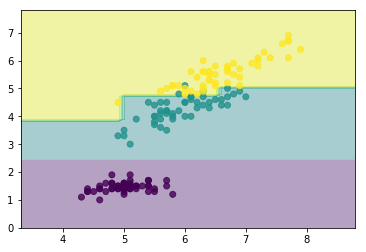

In [18]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# 使用自带的iris数据
iris = datasets.load_iris()
s=[0, 2]
X = iris.data[:, s]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)

# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

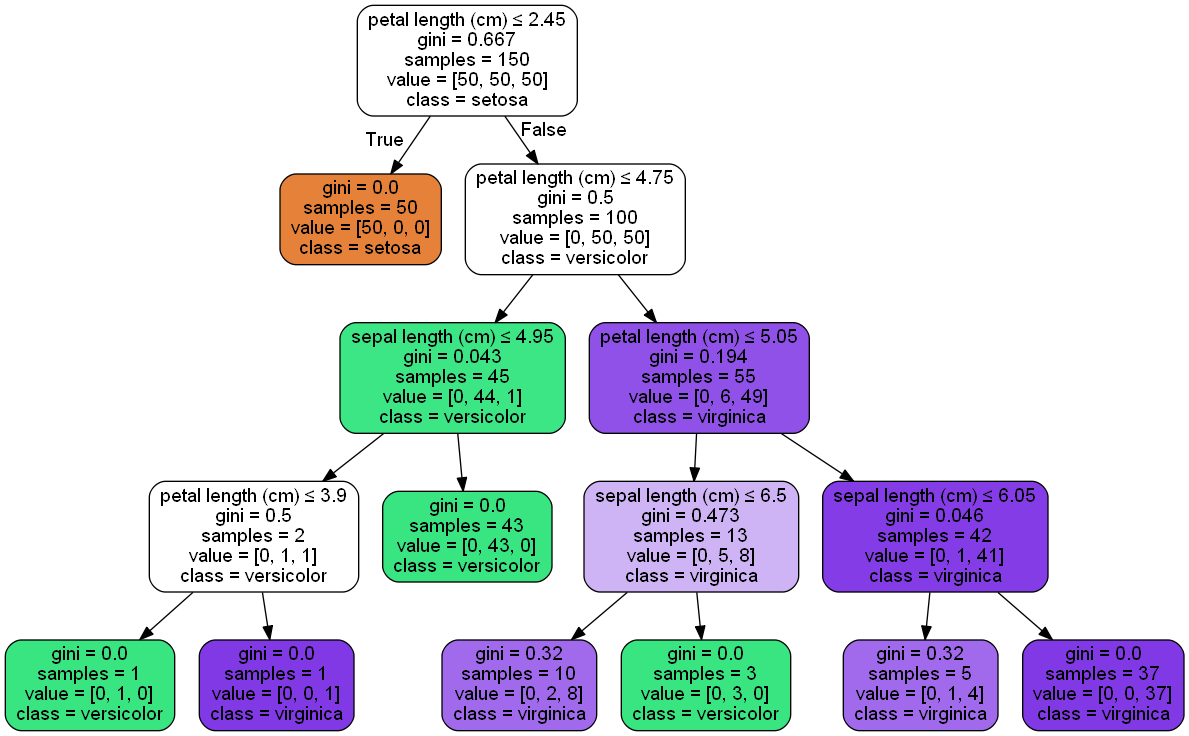

In [25]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=[iris.feature_names[i] for i in s],
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())